In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [35]:
# A1

# Load data from CSV file
data = pd.read_csv('ICICI_BANK.csv')
data.describe()
data.shape
data.isnull().sum()
data=data.dropna()
data.isnull().sum()

# Encode target variable based on price movement
data['Target'] = np.where(data['Close'] > data['Open'], 1, 0)

# Define features and target variable
X = data[['Open']]
Y = data['Target']

# Separate data into two classes based on the target variable
class_0_data = X[Y == 0]
class_1_data = X[Y == 1]

# Calculate mean (centroid) for each class
centroid_0 = np.mean(class_0_data, axis=0)
centroid_1 = np.mean(class_1_data, axis=0)

# Calculate spread (standard deviation) for each class
spread_0 = np.std(class_0_data, axis=0)
spread_1 = np.std(class_1_data, axis=0)

# Calculate distance between mean vectors of the classes
distance_between_means = np.linalg.norm(centroid_0 - centroid_1)

# Print results
print("Mean (centroid) for class 0:", centroid_0)
print("Mean (centroid) for class 1:", centroid_1)
print("Spread (standard deviation) for class 0:", spread_0)
print("Spread (standard deviation) for class 1:", spread_1)
print("Distance between mean vectors of the classes:", distance_between_means)


Mean (centroid) for class 0: Open    603.289476
dtype: float64
Mean (centroid) for class 1: Open    606.082675
dtype: float64
Spread (standard deviation) for class 0: Open    382.791316
dtype: float64
Spread (standard deviation) for class 1: Open    385.208335
dtype: float64
Distance between mean vectors of the classes: 2.793199754705938


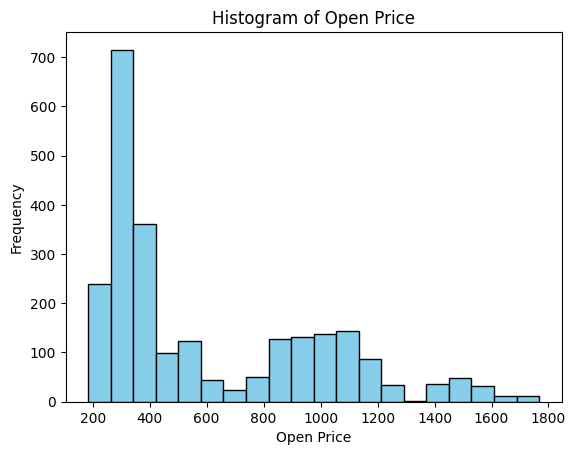

Mean of the feature: 604.585993485342
Variance of the feature: 147392.7556934755


In [37]:
# A2

# Selecting a feature from the dataset (e.g., 'Open' price)
feature_to_analyze = data['Open']

# Plot histogram
plt.hist(feature_to_analyze, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Histogram of Open Price')
plt.show()

# Calculate mean and variance
mean_feature = np.mean(feature_to_analyze)
variance_feature = np.var(feature_to_analyze)

# Print mean and variance
print("Mean of the feature:", mean_feature)
print("Variance of the feature:", variance_feature)


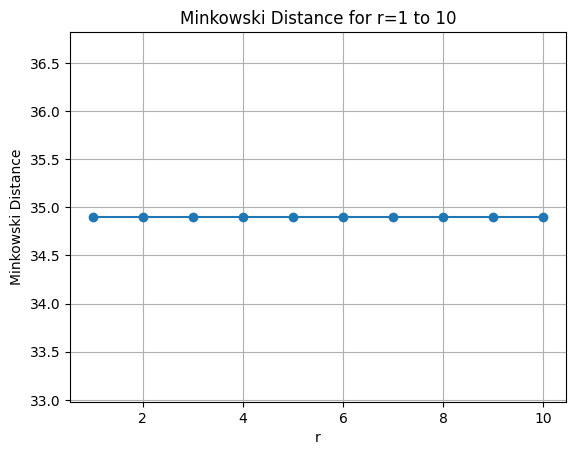

In [39]:
# A3

# Selecting two feature vectors from the dataset
feature_vector_1 = data.iloc[0]['Open']  # Example: selecting the 'Open' price of the first data point
feature_vector_2 = data.iloc[1]['Close']  # Example: selecting the 'Close' price of the second data point

# Convert feature vectors to arrays
feature_vector_1_array = np.array([feature_vector_1])
feature_vector_2_array = np.array([feature_vector_2])

# Calculate Minkowski distance for different values of r
distances = []
for r in range(1, 11):
    distance = np.linalg.norm(feature_vector_1_array - feature_vector_2_array, ord=r)
    distances.append(distance)

# Plot Minkowski distance for r from 1 to 10
plt.plot(range(1, 11), distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance for r=1 to 10')
plt.grid(True)
plt.show()


In [ ]:
X = data[['Open']]
Y = data['Target']

In [42]:
# A4

# Assuming X is the feature vector set and y is the class levels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [43]:
# A5

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# A6

accuracy = neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.49118046132971505


In [45]:
# A7

predictions = neigh.predict(X_test)

In [49]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,

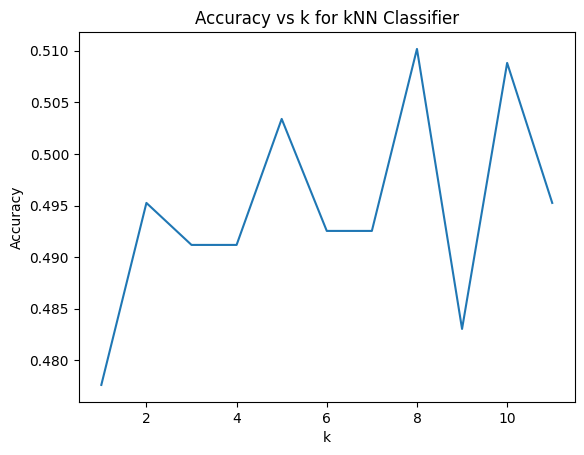

In [46]:
# A8

accuracies = []
for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(range(1, 12), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for kNN Classifier')
plt.show()

In [47]:
# A9

conf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[212 177]
 [198 150]]
Precision: 0.45871559633027525
Recall: 0.43103448275862066
F1 Score: 0.4444444444444444
